#Project East Cost Sediment

##Data Science East Coast Sediment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the data from https://catalog.data.gov/dataset/ecstdb2014-shp-u-s-geological-survey-east-coast-sediment-texture-database-2014

In [2]:
datafull = pd.read_csv('C:\\Users\\User\\Desktop\\Portfolio\\ProjectEastCoastSediment\\ecstdb2014.csv')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Column **14** has mixed types, which is preventing us from importing the data. To fix this we will assign the column the type '*str*'.

In [3]:
datafull = pd.read_csv('C:\\Users\\User\\Desktop\\Portfolio\\ProjectEastCoastSediment\\ecstdb2014.csv', dtype={'DAY_COLL': np.str})

#Let's take a look at a sample of the data.

In [4]:
datafull.head()

,GROUP,DB_ID,FIELD_NO,PROJECT,CRUISE_ID,CONTACT,AREA,LATITUDE,LONGITUDE,DEPTH_M,...,PHI_6,PHI_7,PHI_8,PHI_9,PHI_10,PHI_11,ANALYST,ANAL_COMM,LITHOLOGY,COMMENTS
0,1,A002,A002,USGS/WHOI,AB3 70,NaN,NANTUCKET SHOALS,41.10000,-69.28333,51.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,Verbal description made at a later date,GRANULE-BOULDER,BOTTOM TEMP 8.2
1,1,A003,A003,USGS/WHOI,AB3 70,NaN,SW CHANNEL,40.85000,-68.91667,66.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,Verbal description made at a later date,COARSE SAND,BOTTOM TEMP 8.4
2,1,A012,A012,USGS/WHOI,AB3 70,NaN,GEORGES BANK,41.38333,-66.98333,69.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,MEDIUM SAND,BOTTOM TEMP 8.4
3,1,A015,A015,USGS/WHOI,AB3 70,NaN,GEORGES BANK,41.63333,-67.95000,20.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,NaN,MEDIUM SAND,BOTTOM TEMP 8.2
4,1,A016,A016,USGS/WHOI,AB3 70,NaN,GEORGES BANK,41.35000,-67.98333,33.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,NaN,Verbal description made at a later date,MEDIUM SAND,BOTTOM TEMP 7.9


#There are **58** columns. We don't need nearly that many. We'll create a subset of the data, with only the columns we'll be using.

In [5]:
data = datafull.iloc[:, [6,13,19,20,21,22,23]]

In [6]:
data.head()

,AREA,MONTH_COLL,WEIGHT,GRAVEL_PCT,SAND_PCT,SILT_PCT,CLAY_PCT
0,NANTUCKET SHOALS,12,-9999.0,46.0,54.0,0.0,0.0
1,SW CHANNEL,12,-9999.0,6.0,93.6,0.0,0.0
2,GEORGES BANK,12,-9999.0,0.0,100.0,0.0,0.0
3,GEORGES BANK,12,-9999.0,0.0,100.0,0.0,0.0
4,GEORGES BANK,12,-9999.0,16.0,84.0,0.0,0.0


#That looks better. Now we'll clean up the names of the columns.

In [7]:
data.columns = ['Area', 'Month', 'Weight', 'Gravel_PCT', 'Sand_PCT', 'Silt_PCT', 'Clay_PCT']

In [8]:
data.head()

,Area,Month,Weight,Gravel_PCT,Sand_PCT,Silt_PCT,Clay_PCT
0,NANTUCKET SHOALS,12,-9999.0,46.0,54.0,0.0,0.0
1,SW CHANNEL,12,-9999.0,6.0,93.6,0.0,0.0
2,GEORGES BANK,12,-9999.0,0.0,100.0,0.0,0.0
3,GEORGES BANK,12,-9999.0,0.0,100.0,0.0,0.0
4,GEORGES BANK,12,-9999.0,16.0,84.0,0.0,0.0


#Next let's remove any rows that have the value -9999.0, so they don't mess up our analyses.
#This will be done over two lines, to make it easier to see the coding.

In [9]:
data = data[(data['Weight'] != -9999.0) & (data['Month'] != -9999.0) & (data['Gravel_PCT'] != -9999.0)]

In [10]:
data = data[(data['Sand_PCT'] != -9999.0) & (data['Silt_PCT'] != -9999.0) & (data['Clay_PCT'] != -9999.0)]

In [11]:
data.head()

,Area,Month,Weight,Gravel_PCT,Sand_PCT,Silt_PCT,Clay_PCT
3823,GEORGES BANK,7,24.54,0.53,99.35,0.05,0.07
3824,GEORGES BANK,7,21.21,0.19,99.72,0.05,0.04
3825,GEORGES BANK,7,16.88,0.59,99.29,0.07,0.05
3826,GEORGES BANK,7,20.41,0.39,99.51,0.05,0.05
3827,GEORGES BANK,7,21.75,0.46,99.45,0.05,0.04


#Here we'll focus on one area to analyse. We'll choose *Georges Bank*.

In [12]:
dataGB = data.loc[data['Area'] == 'GEORGES BANK']

#Let's look at the <font color="red">seasonality</font> of sediment types. We'll look at the averages of the sediment percents by month.

In [13]:
dataGBave = dataGB.groupby('Month')[['Gravel_PCT', 'Sand_PCT', 'Silt_PCT','Clay_PCT']].mean()

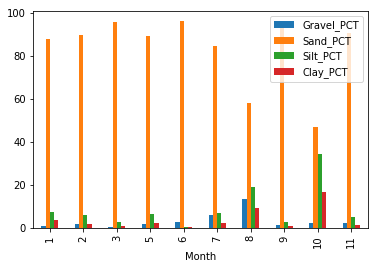

In [14]:
dataGBave.plot.bar()

#<font color="yellow">Sand</font> has by far the highest percent through out the year. However on average it dips quite a bit in August and October.

#Now let's look at the <font color="red">seasonality</font> of the weight.

In [15]:
dataGBwt = dataGB.groupby('Month')[['Weight']].mean()

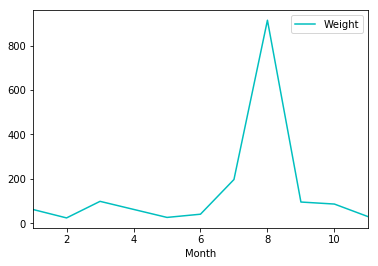

In [16]:
dataGBwt.plot(color='c')

#There is a huge increase in weight from July to Agusut. This drops off again in Septemebr to normal levels.